In [108]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from dateutil.relativedelta import relativedelta

# Reading Data

In [109]:
campaigns = pd.read_csv('./data/campaigns.csv')

donors = pd.read_csv('./data/donors.csv')

gifts = pd.read_csv('./data/gifts.csv')

campaigns_campaign_id = pd.read_csv('./data/selection campaign 7244.csv')

In [110]:
end_date_for_ind_variable = datetime.datetime(2019, 5, 18)
campaign_launched = datetime.datetime(2019, 6, 18)
end_date_tar_variable = datetime.datetime(2020, 1, 1)
campaign_id = 7244

# GIFTS

### Checking data in gifts

In [111]:

print(gifts.isna().sum().sum())
for column in gifts.columns[0:]:
    print(column + " " + str(gifts[column].isna().sum()))

gifts.info()

15637
Unnamed: 0 0
donorID 0
campaignID 15637
amount 0
date 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  216594 non-null  int64  
 1   donorID     216594 non-null  int64  
 2   campaignID  200957 non-null  float64
 3   amount      216594 non-null  object 
 4   date        216594 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.3+ MB


### Cleaning data in gifts

In [112]:
gifts['campaignID'] = gifts['campaignID'].fillna(0.0)
gifts['campaignID'] = gifts['campaignID'].astype(int)
gifts['amount'] = gifts['amount'].str.replace(",", ".").astype(float)
gifts['date'] = pd.to_datetime(gifts['date'])
gifts.rename(columns={'Unnamed: 0' : 'giftID'}, inplace=True)
gifts.head()

,giftID,donorID,campaignID,amount,date
0,0,100001,0,12.39,2004-03-23
1,1,100001,1577,12.39,2007-10-11
2,2,100001,1634,6.69,2007-12-28
3,3,100001,1778,24.79,2008-06-14
4,4,100001,1808,7.44,2008-07-09


### Adding columns to gift table

In [113]:
gifts['Quater'] = np.where(gifts['date'].dt.month < 4, 'Q1', np.where(gifts['date'].dt.month < 7, 'Q2', np.where(gifts['date'].dt.month < 10, 'Q3','Q4')))
gifts.head()


,giftID,donorID,campaignID,amount,date,Quater
0,0,100001,0,12.39,2004-03-23,Q1
1,1,100001,1577,12.39,2007-10-11,Q4
2,2,100001,1634,6.69,2007-12-28,Q4
3,3,100001,1778,24.79,2008-06-14,Q2
4,4,100001,1808,7.44,2008-07-09,Q3


# DONORS

### Checking data in donors

In [114]:
print(donors.isna().sum().sum())
for column in donors.columns[0:]:
    print(column + " " + str(donors[column].isna().sum()))
donors.head()

34
Unnamed: 0 0
donorID 0
zipcode 2
province 0
region 0
gender 32
language 0
dateOfBirth 0


,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


### Cleaning data in donors

In [115]:
donors_zipcode_na = donors.loc[donors['zipcode'].isna(), :]
donors_zipcode_na.head()
donors['zipcode'] = donors['zipcode'].fillna(0)

In [116]:
donors_gender_na = donors.loc[donors['gender'].isna(), :]
donors_gender_na.head()
donors['gender'] = donors['gender'].fillna('Not Known')

In [117]:
donors.drop(['Unnamed: 0'] , axis = 1, inplace=True)
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  int64  
 1   zipcode      44691 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44691 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


# CAMPAIGNS

### Checking data in campaigns

In [118]:
print(campaigns.isna().sum().sum())
for column in campaigns.columns[0:]:
    print(column + " " + str(campaigns[column].isna().sum()))

campaigns.info()

0
campaignID;date;lettersSent;CostUnit 0
<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 153;13/12/2004;6 873;0 to 7536;15/12/2019;37 187;0
Data columns (total 1 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   campaignID;date;lettersSent;CostUnit  367 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


In [119]:
campaigns.head()

,campaignID;date;lettersSent;CostUnit
153;13/12/2004;6 873;0,17 €
154;01/01/2005;7 656;0,30 €
180;18/01/2005;9 933;0,20 €
433;29/01/2005;7 448;0,59 €
476;12/02/2005;6 605;0,51 €


### Cleaning data in campaigns

In [120]:
campaigns = pd.read_csv('./data/campaigns.csv')
campaigns.rename(columns={campaigns.columns[0]: "Cost" }, inplace = True)
campaigns.index.names = ['campaignID;date;lettersSent;CostUnit']
campaigns_reset = campaigns.reset_index()
campaigns_split = campaigns_reset['campaignID;date;lettersSent;CostUnit'].str.split(';', expand=True)
campaigns_split['cost'] = campaigns_reset['Cost']
campaigns_split.rename(columns={0: "campaignID" }, inplace = True)
campaigns_split.rename(columns={1: "date" }, inplace = True)
campaigns_split.rename(columns={2: "lettersSent" }, inplace = True)
campaigns_split.drop([3] , axis = 1, inplace=True)
campaigns_split.head()

,campaignID,date,lettersSent,cost
0,153,13/12/2004,6 873,17 €
1,154,01/01/2005,7 656,30 €
2,180,18/01/2005,9 933,20 €
3,433,29/01/2005,7 448,59 €
4,476,12/02/2005,6 605,51 €


In [121]:
campaigns_split['campaignID'] = campaigns_split['campaignID'].astype(int)
campaigns_split['date'] = pd.to_datetime(campaigns_split['date'])
campaigns_split['lettersSent'] = campaigns_split['lettersSent'].str.replace("\u202f", "").astype(int)
campaigns_split['cost'] = campaigns_split['cost'].str.replace("\xa0€", "").astype(int)
campaigns = campaigns_split
campaigns.head()


,campaignID,date,lettersSent,cost
0,153,2004-12-13,6873,17
1,154,2005-01-01,7656,30
2,180,2005-01-18,9933,20
3,433,2005-01-29,7448,59
4,476,2005-12-02,6605,51


In [122]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaignID   367 non-null    int32         
 1   date         367 non-null    datetime64[ns]
 2   lettersSent  367 non-null    int32         
 3   cost         367 non-null    int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 7.3 KB


### Creating Features

In [123]:
#Calculating summary for donors till Aug 4th 2018
gifts_donor_campaignID = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['campaignID'].agg({'number_of_campaigns':'count'})
gifts_donor_total_amount = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['amount'].agg({'total_amount':'sum'})
gifts_donor_last_date = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['date'].agg({'last_date':'max'})
gifts_donor_last_date = gifts[gifts['date'] < end_date_for_ind_variable].groupby('donorID', as_index=False)['date'].agg({'last_date':'max'})
gifts_donor_quater_contribution = gifts[gifts['date'] < end_date_for_ind_variable].groupby(['donorID', 'Quater'], as_index=False)['date'].agg({'count'}).unstack('Quater')


donors = donors.merge(gifts_donor_campaignID, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_total_amount, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_last_date, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_quater_contribution, left_on = 'donorID', right_on = 'donorID', how = 'left')

donors.rename(columns={('count', 'Q1') : 'Q1_Donations', ('count', 'Q2') : 'Q2_Donations', ('count', 'Q3') : 'Q3_Donations', ('count', 'Q4') : 'Q4_Donations'}, inplace = True)

donors['days_since_contributed'] = end_date_for_ind_variable - donors['last_date'] 
donors.head() 

C:\tools\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,Q1_Donations,Q2_Donations,Q3_Donations,Q4_Donations,days_since_contributed
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,3.0,3.0,1.0,5.0,2696 days
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,1.0,NaN,NaN,NaN,1589 days
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,11.0,42.00,2019-05-06,3.0,2.0,5.0,1.0,12 days
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,8.0,4.0,4.0,10.0,2906 days
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,5.0,24.96,2019-04-18,NaN,2.0,NaN,3.0,30 days


In [124]:
#Calculating summary for donors till Aug 4th 2018
gifts_donor_summary = gifts[gifts['date'] < end_date_for_ind_variable].groupby(['donorID'], as_index=False)['amount'].agg(['mean', 'min', 'max'])
gifts_donor_quater_spending = gifts[gifts['date'] < end_date_for_ind_variable].groupby(['donorID', 'Quater'], as_index=False)['amount'].agg({'mean', 'min', 'max', 'sum'}).unstack('Quater')

donors = donors.merge(gifts_donor_summary, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors = donors.merge(gifts_donor_quater_spending, left_on = 'donorID', right_on = 'donorID', how = 'left')
donors.head()
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 0 to 44690
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   donorID                 44691 non-null  int64          
 1   zipcode                 44691 non-null  float64        
 2   province                44691 non-null  object         
 3   region                  44691 non-null  object         
 4   gender                  44691 non-null  object         
 5   language                44691 non-null  object         
 6   dateOfBirth             44691 non-null  object         
 7   number_of_campaigns     44686 non-null  float64        
 8   total_amount            44686 non-null  float64        
 9   last_date               44686 non-null  datetime64[ns] 
 10  Q1_Donations            24511 non-null  float64        
 11  Q2_Donations            24567 non-null  float64        
 12  Q3_Donations            21485 no

C:\tools\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [125]:
donors['days_since_contributed'] = donors['days_since_contributed'].dt.days
donors.fillna(0)

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(sum, Q3)","(sum, Q4)","(max, Q1)","(max, Q2)","(max, Q3)","(max, Q4)","(min, Q1)","(min, Q2)","(min, Q3)","(min, Q4)"
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30 00:00:00,...,7.44,63.87,20.0,30.00,7.44,24.79,10.00,10.00,7.44,6.69
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10 00:00:00,...,0.00,0.00,20.0,0.00,0.00,0.00,20.00,0.00,0.00,0.00
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,11.0,42.00,2019-05-06 00:00:00,...,18.00,4.00,4.0,4.00,5.00,4.00,4.00,4.00,3.00,4.00
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03 00:00:00,...,99.16,283.11,30.0,30.00,24.79,49.58,24.79,24.79,24.79,24.79
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,5.0,24.96,2019-04-18 00:00:00,...,0.00,9.96,0.0,10.00,0.00,5.00,0.00,5.00,0.00,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,144687,4900.0,Liege,Wallonia,M,FR,09/12/1970,1.0,10.00,2015-11-06 00:00:00,...,0.00,10.00,0.0,0.00,0.00,10.00,0.00,0.00,0.00,10.00
44687,144688,3600.0,Limburg,Flanders,M,NL,11/28/1972,7.0,48.56,2017-07-27 00:00:00,...,15.00,6.20,5.0,7.44,15.00,6.20,5.00,2.48,15.00,6.20
44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967,3.0,224.79,2019-05-01 00:00:00,...,24.79,0.00,0.0,100.00,24.79,0.00,0.00,100.00,24.79,0.00
44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976,1.0,40.00,2014-12-30 00:00:00,...,0.00,40.00,0.0,0.00,0.00,40.00,0.00,0.00,0.00,40.00


In [126]:
#Calculating age for donors till Aug 4th 2018
donors.loc[:,'age'] = donors['dateOfBirth'].apply(lambda x : end_date_for_ind_variable.year - pd.to_datetime(x).year)
donors.loc[:,'age-group'] = donors['age'] // 10 * 10
donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(max, Q1)","(max, Q2)","(max, Q3)","(max, Q4)","(min, Q1)","(min, Q2)","(min, Q3)","(min, Q4)",age,age-group
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,20.0,30.0,7.44,24.79,10.00,10.00,7.44,6.69,52,50
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,20.0,NaN,NaN,NaN,20.00,NaN,NaN,NaN,67,60
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,11.0,42.00,2019-05-06,...,4.0,4.0,5.00,4.00,4.00,4.00,3.00,4.00,33,30
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,...,30.0,30.0,24.79,49.58,24.79,24.79,24.79,24.79,67,60
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,5.0,24.96,2019-04-18,...,NaN,10.0,NaN,5.00,NaN,5.00,NaN,2.48,33,30


In [127]:
gifts.head()

,giftID,donorID,campaignID,amount,date,Quater
0,0,100001,0,12.39,2004-03-23,Q1
1,1,100001,1577,12.39,2007-10-11,Q4
2,2,100001,1634,6.69,2007-12-28,Q4
3,3,100001,1778,24.79,2008-06-14,Q2
4,4,100001,1808,7.44,2008-07-09,Q3


In [128]:
campaigns_campaign_id.nunique()

donorID    25645
dtype: int64

In [129]:
selected_donors = donors.merge(campaigns_campaign_id, left_on='donorID', right_on='donorID', how = 'inner')
selected_donors.head()
selected_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   donorID                 25645 non-null  int64         
 1   zipcode                 25645 non-null  float64       
 2   province                25645 non-null  object        
 3   region                  25645 non-null  object        
 4   gender                  25645 non-null  object        
 5   language                25645 non-null  object        
 6   dateOfBirth             25645 non-null  object        
 7   number_of_campaigns     25644 non-null  float64       
 8   total_amount            25644 non-null  float64       
 9   last_date               25644 non-null  datetime64[ns]
 10  Q1_Donations            13953 non-null  float64       
 11  Q2_Donations            13337 non-null  float64       
 12  Q3_Donations            10980 non-null  float6

In [130]:
donors 

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(max, Q1)","(max, Q2)","(max, Q3)","(max, Q4)","(min, Q1)","(min, Q2)","(min, Q3)","(min, Q4)",age,age-group
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,20.0,30.00,7.44,24.79,10.00,10.00,7.44,6.69,52,50
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,20.0,NaN,NaN,NaN,20.00,NaN,NaN,NaN,67,60
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986,11.0,42.00,2019-05-06,...,4.0,4.00,5.00,4.00,4.00,4.00,3.00,4.00,33,30
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952,26.0,716.22,2011-06-03,...,30.0,30.00,24.79,49.58,24.79,24.79,24.79,24.79,67,60
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986,5.0,24.96,2019-04-18,...,NaN,10.00,NaN,5.00,NaN,5.00,NaN,2.48,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,144687,4900.0,Liege,Wallonia,M,FR,09/12/1970,1.0,10.00,2015-11-06,...,NaN,NaN,NaN,10.00,NaN,NaN,NaN,10.00,49,40
44687,144688,3600.0,Limburg,Flanders,M,NL,11/28/1972,7.0,48.56,2017-07-27,...,5.0,7.44,15.00,6.20,5.00,2.48,15.00,6.20,47,40
44688,144689,3061.0,Flemish Brabant,Flanders,M,NL,04/21/1967,3.0,224.79,2019-05-01,...,NaN,100.00,24.79,NaN,NaN,100.00,24.79,NaN,52,50
44689,144690,1950.0,Flemish Brabant,Flanders,M,FR,05/07/1976,1.0,40.00,2014-12-30,...,NaN,NaN,NaN,40.00,NaN,NaN,NaN,40.00,43,40


In [131]:
# Checking for mutiple donations for campaign campaign_id
gifts1 = gifts[gifts['campaignID'] == campaign_id]
agg_gifts = gifts1.groupby(['donorID'])['date'].agg(['count']).sort_values(by = 'count', ascending =False)


In [132]:
selected_donors = selected_donors.merge(gifts1, left_on='donorID', right_on='donorID', how = 'left')
# If Contribution made after May 18 

In [133]:
selected_donors['amount'].fillna(0)
#selected_donors.loc[(selected_donors['amount'] > 30) and (selected_donors['date'] > campaign_launched) and (selected_donors['date'] < end_date_tar_variable), 'has_contributed'] = 1

selected_donors['has_contributed'] = np.where((selected_donors['amount'] > 30) & (selected_donors['date'] > campaign_launched) & (selected_donors['date'] < end_date_tar_variable),1, 0)

selected_donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"(min, Q3)","(min, Q4)",age,age-group,giftID,campaignID,amount,date,Quater,has_contributed
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,7.44,6.69,52,50,NaN,NaN,NaN,NaT,NaN,0
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,NaN,NaN,67,60,NaN,NaN,NaN,NaT,NaN,0
2,100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937,3.0,124.37,2011-10-28,...,NaN,24.79,82,80,NaN,NaN,NaN,NaT,NaN,0
3,100009,1020.0,Brussels,Brussels,M,FR,01/20/1932,19.0,326.78,2012-03-25,...,20.00,7.44,87,80,NaN,NaN,NaN,NaT,NaN,0
4,100010,1020.0,Brussels,Brussels,M,FR,05/30/1983,1.0,40.00,2015-01-13,...,NaN,NaN,36,30,NaN,NaN,NaN,NaT,NaN,0


In [134]:
for column in selected_donors.columns:
    print(column)

donorID
zipcode
province
region
gender
language
dateOfBirth
number_of_campaigns
total_amount
last_date
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
('mean', 'Q1')
('mean', 'Q2')
('mean', 'Q3')
('mean', 'Q4')
('sum', 'Q1')
('sum', 'Q2')
('sum', 'Q3')
('sum', 'Q4')
('max', 'Q1')
('max', 'Q2')
('max', 'Q3')
('max', 'Q4')
('min', 'Q1')
('min', 'Q2')
('min', 'Q3')
('min', 'Q4')
age
age-group
giftID
campaignID
amount
date
Quater
has_contributed


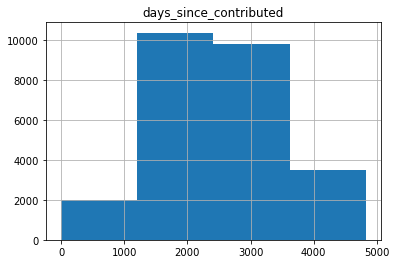

In [135]:
selected_donors.hist('days_since_contributed', bins = 4)

selected_donors['class_based_on_last_contribution_day'] = np.where(selected_donors['days_since_contributed'] > 4500, 'D', np.where(selected_donors['days_since_contributed'] > 3000, 'C',  np.where(selected_donors['days_since_contributed'] > 1700, 'A', 'B')))

In [136]:
selected_donors.loc[:,['days_since_contributed','class_based_on_last_contribution_day']]

,days_since_contributed,class_based_on_last_contribution_day
0,2696.0,A
1,1589.0,B
2,2759.0,A
3,2610.0,A
4,1586.0,B
...,...,...
25640,1011.0,B
25641,1315.0,B
25642,1481.0,B
25643,1600.0,B


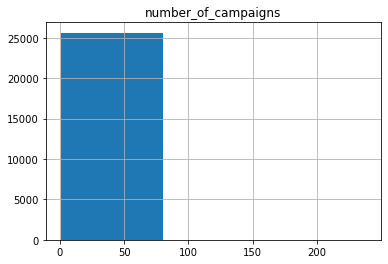

In [137]:
selected_donors.hist('number_of_campaigns', bins = 3)
selected_donors['class_based_on_num_campaigns'] = np.where(selected_donors['number_of_campaigns'] < 25, 'A', np.where(selected_donors['number_of_campaigns'] < 50, 'B', 'C'))

In [138]:
selected_donors.loc[:,['number_of_campaigns','class_based_on_last_contribution_day']]

,number_of_campaigns,class_based_on_last_contribution_day
0,12.0,A
1,1.0,B
2,3.0,A
3,19.0,A
4,1.0,B
...,...,...
25640,1.0,B
25641,1.0,B
25642,1.0,B
25643,1.0,B


In [139]:
def assignlables_2bins(column, l1, l2):
    column_name = 'class_based_on_' + str(column)
    selected_donors.boxplot(column)
    selected_donors[column_name] = np.where(selected_donors[column] < l1, 'A', np.where(selected_donors[column] < l2, 'B', 'C'))
    print(selected_donors.loc[:,[column, column_name]])

In [140]:
def assignlables_4bins(column, l1 = 0, l2 = 0, l3 = 0):
    column_name = 'class_based_on_' + str(column)
    max = selected_donors[column].max()
    bins =   [max*0.25, max*0.5, max*0.75]
    selected_donors.hist(column, bins = bins)
    selected_donors[column_name] = np.where(selected_donors[column] <= bins[0], 'A', np.where(selected_donors[column] <= bins[1], 'B', np.where(selected_donors[column] <= bins[2], 'C', 'D')))
    print(selected_donors.loc[:,[column, column_name]])

In [141]:
def assignlables_3bins(column, l1):
    column_name = 'class_based_on_' + str(column)
    selected_donors.boxplot(column)
    selected_donors[column_name] = np.where(selected_donors[column] < l1, 'A', 'B')
    print(selected_donors.loc[:,[column, column_name]])

       Q1_Donations class_based_on_Q1_Donations
0               3.0                           B
1               1.0                           B
2               NaN                           D
3               5.0                           B
4               1.0                           B
...             ...                         ...
25640           NaN                           D
25641           NaN                           D
25642           NaN                           D
25643           NaN                           D
25644           NaN                           D

[25645 rows x 2 columns]


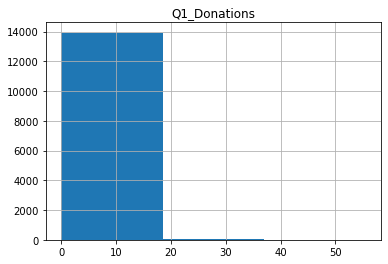

In [142]:
assignlables_4bins('Q1_Donations', 9) 

       Q2_Donations class_based_on_Q2_Donations
0               3.0                           B
1               NaN                           D
2               1.0                           B
3               4.0                           B
4               NaN                           D
...             ...                         ...
25640           NaN                           D
25641           NaN                           D
25642           1.0                           B
25643           NaN                           D
25644           NaN                           D

[25645 rows x 2 columns]


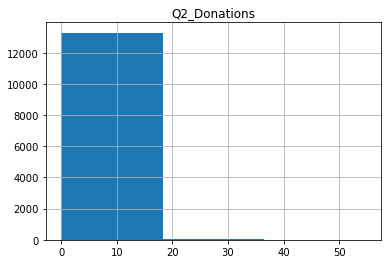

In [143]:
assignlables_4bins('Q2_Donations', 9)

       Q3_Donations class_based_on_Q3_Donations
0               1.0                           B
1               NaN                           D
2               NaN                           D
3               4.0                           B
4               NaN                           D
...             ...                         ...
25640           1.0                           B
25641           NaN                           D
25642           NaN                           D
25643           NaN                           D
25644           NaN                           D

[25645 rows x 2 columns]


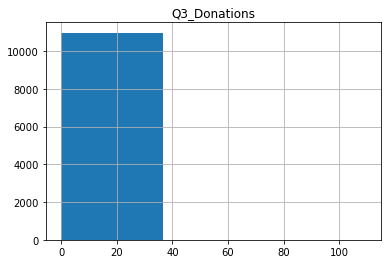

In [144]:
assignlables_4bins('Q3_Donations', 8, 17) # 0-7 = A,  7-16 = B, C

       Q4_Donations class_based_on_Q4_Donations
0               5.0                           B
1               NaN                           D
2               2.0                           B
3               6.0                           B
4               NaN                           D
...             ...                         ...
25640           NaN                           D
25641           1.0                           B
25642           NaN                           D
25643           1.0                           B
25644           1.0                           B

[25645 rows x 2 columns]


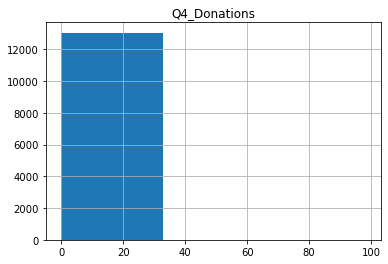

In [145]:
assignlables_4bins('Q4_Donations',6, 14) # 0-5 = A,  5-13 = B, C

       total_amount class_based_on_total_amount
0            178.49                           B
1             20.00                           B
2            124.37                           B
3            326.78                           B
4             40.00                           B
...             ...                         ...
25640         40.00                           B
25641         50.00                           B
25642         50.00                           B
25643         40.00                           B
25644         39.00                           B

[25645 rows x 2 columns]


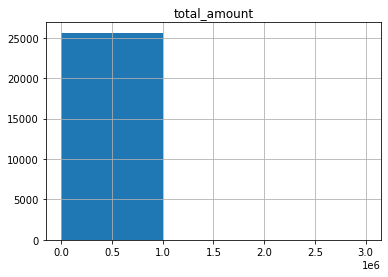

In [146]:
assignlables_4bins('total_amount',2100) 

       age class_based_on_age
0       52                  C
1       67                  D
2       82                  D
3       87                  D
4       36                  C
...    ...                ...
25640   37                  C
25641   34                  C
25642   55                  C
25643   43                  C
25644   32                  B

[25645 rows x 2 columns]


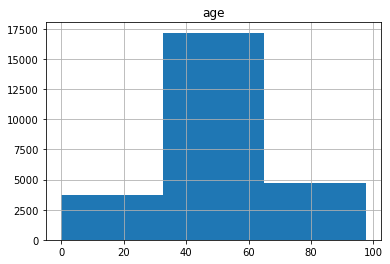

In [147]:
assignlables_4bins('age',50, 72)

       age-group class_based_on_age-group
0             50                        C
1             60                        C
2             80                        D
3             80                        D
4             30                        B
...          ...                      ...
25640         30                        B
25641         30                        B
25642         50                        C
25643         40                        C
25644         30                        B

[25645 rows x 2 columns]


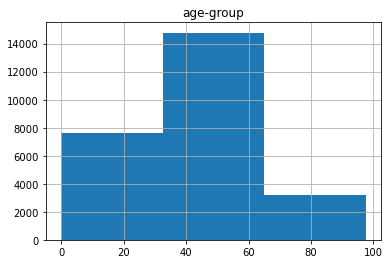

In [148]:
assignlables_4bins('age-group',45, 65)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q1) class_based_on_('sum', 'Q1')
0          42.39                            B
1          20.00                            B
2            NaN                            D
3          79.78                            B
4          40.00                            B
...          ...                          ...
25640        NaN                            D
25641        NaN                            D
25642        NaN                            D
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


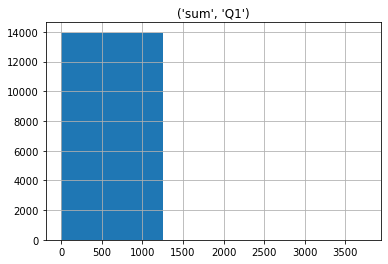

In [149]:
assignlables_4bins(('sum', 'Q1'),250, 620)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q2) class_based_on_('sum', 'Q2')
0          64.79                            B
1            NaN                            D
2          49.58                            B
3          67.39                            B
4            NaN                            D
...          ...                          ...
25640        NaN                            D
25641        NaN                            D
25642      50.00                            B
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


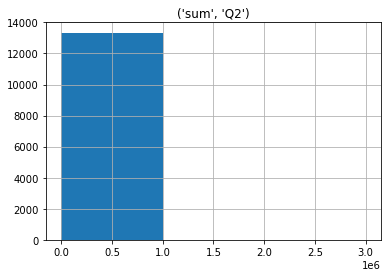

In [150]:
assignlables_4bins(('sum', 'Q2'),450, 1000)

       (sum, Q3) class_based_on_('sum', 'Q3')
0           7.44                            B
1            NaN                            D
2            NaN                            D
3          95.00                            B
4            NaN                            D
...          ...                          ...
25640      40.00                            B
25641        NaN                            D
25642        NaN                            D
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


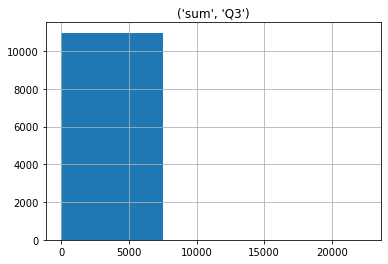

In [151]:
assignlables_4bins(('sum', 'Q3'),250, 450)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (sum, Q4) class_based_on_('sum', 'Q4')
0          63.87                            B
1            NaN                            D
2          74.79                            B
3          84.61                            B
4            NaN                            D
...          ...                          ...
25640        NaN                            D
25641      50.00                            B
25642        NaN                            D
25643      40.00                            B
25644      39.00                            B

[25645 rows x 2 columns]


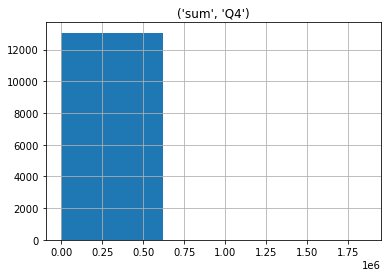

In [152]:
assignlables_4bins(('sum', 'Q4'),250, 650)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q1) class_based_on_('min', 'Q1')
0          10.00                            B
1          20.00                            B
2            NaN                            D
3          12.39                            B
4          40.00                            B
...          ...                          ...
25640        NaN                            D
25641        NaN                            D
25642        NaN                            D
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


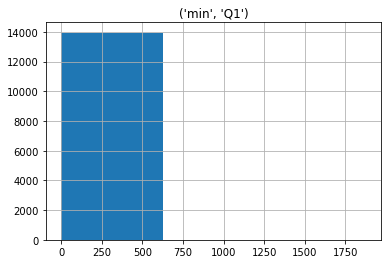

In [153]:
assignlables_4bins(('min', 'Q1'),55, 110)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q2) class_based_on_('min', 'Q2')
0          10.00                            B
1            NaN                            D
2          49.58                            B
3          10.00                            B
4            NaN                            D
...          ...                          ...
25640        NaN                            D
25641        NaN                            D
25642      50.00                            B
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


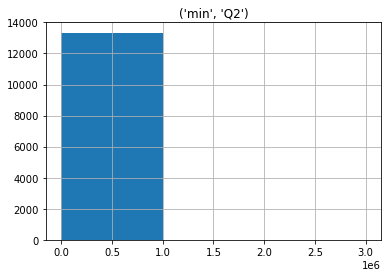

In [154]:
assignlables_4bins(('min', 'Q2'),43, 83)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q3) class_based_on_('min', 'Q3')
0           7.44                            B
1            NaN                            D
2            NaN                            D
3          20.00                            B
4            NaN                            D
...          ...                          ...
25640      40.00                            B
25641        NaN                            D
25642        NaN                            D
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


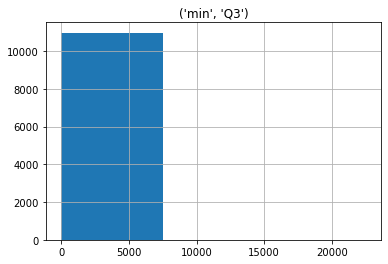

In [155]:
assignlables_4bins(('min', 'Q3'),300)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (min, Q4) class_based_on_('min', 'Q4')
0           6.69                            B
1            NaN                            D
2          24.79                            B
3           7.44                            B
4            NaN                            D
...          ...                          ...
25640        NaN                            D
25641      50.00                            B
25642        NaN                            D
25643      40.00                            B
25644      39.00                            B

[25645 rows x 2 columns]


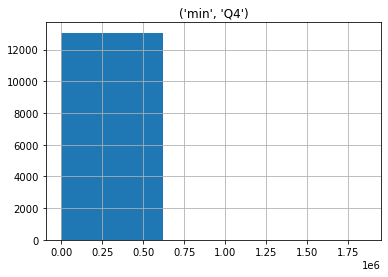

In [156]:
assignlables_4bins(('min', 'Q4'),300, 650)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q1) class_based_on_('max', 'Q1')
0           20.0                            B
1           20.0                            B
2            NaN                            D
3           20.0                            B
4           40.0                            B
...          ...                          ...
25640        NaN                            D
25641        NaN                            D
25642        NaN                            D
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


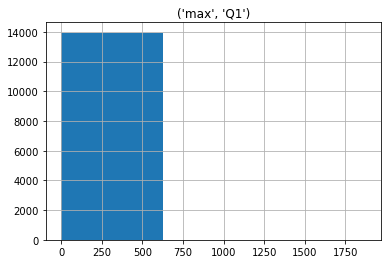

In [157]:
assignlables_4bins(('max', 'Q1'),110, 220)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q2) class_based_on_('max', 'Q2')
0          30.00                            B
1            NaN                            D
2          49.58                            B
3          25.00                            B
4            NaN                            D
...          ...                          ...
25640        NaN                            D
25641        NaN                            D
25642      50.00                            B
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


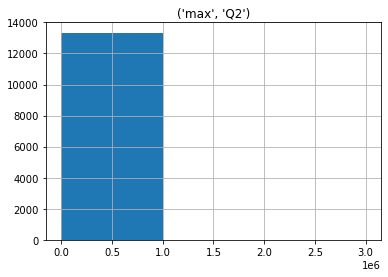

In [158]:
assignlables_4bins(('max', 'Q2'),300)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q3) class_based_on_('max', 'Q3')
0           7.44                            B
1            NaN                            D
2            NaN                            D
3          25.00                            B
4            NaN                            D
...          ...                          ...
25640      40.00                            B
25641        NaN                            D
25642        NaN                            D
25643        NaN                            D
25644        NaN                            D

[25645 rows x 2 columns]


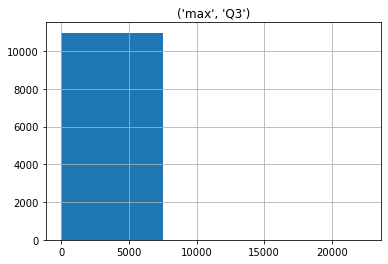

In [159]:
assignlables_4bins(('max', 'Q3'),210, 410)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (max, Q4) class_based_on_('max', 'Q4')
0          24.79                            B
1            NaN                            D
2          50.00                            B
3          20.00                            B
4            NaN                            D
...          ...                          ...
25640        NaN                            D
25641      50.00                            B
25642        NaN                            D
25643      40.00                            B
25644      39.00                            B

[25645 rows x 2 columns]


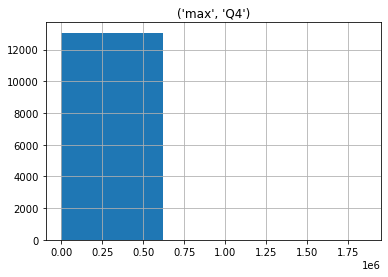

In [160]:
assignlables_4bins(('max', 'Q4'),450)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q1) class_based_on_('mean', 'Q1')
0          14.130                             B
1          20.000                             B
2             NaN                             D
3          15.956                             B
4          40.000                             B
...           ...                           ...
25640         NaN                             D
25641         NaN                             D
25642         NaN                             D
25643         NaN                             D
25644         NaN                             D

[25645 rows x 2 columns]


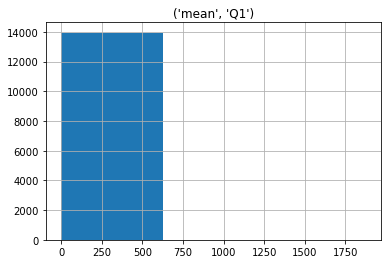

In [161]:
assignlables_4bins(('mean', 'Q1'),110)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q1) class_based_on_('mean', 'Q1')
0          14.130                             B
1          20.000                             B
2             NaN                             D
3          15.956                             B
4          40.000                             B
...           ...                           ...
25640         NaN                             D
25641         NaN                             D
25642         NaN                             D
25643         NaN                             D
25644         NaN                             D

[25645 rows x 2 columns]


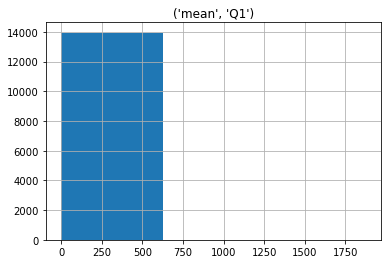

In [162]:
assignlables_4bins(('mean', 'Q1'),110)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q2) class_based_on_('mean', 'Q2')
0       21.596667                             B
1             NaN                             D
2       49.580000                             B
3       16.847500                             B
4             NaN                             D
...           ...                           ...
25640         NaN                             D
25641         NaN                             D
25642   50.000000                             B
25643         NaN                             D
25644         NaN                             D

[25645 rows x 2 columns]


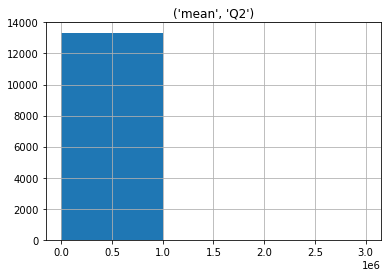

In [163]:
assignlables_4bins(('mean', 'Q2'),130)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q3) class_based_on_('mean', 'Q3')
0            7.44                             B
1             NaN                             D
2             NaN                             D
3           23.75                             B
4             NaN                             D
...           ...                           ...
25640       40.00                             B
25641         NaN                             D
25642         NaN                             D
25643         NaN                             D
25644         NaN                             D

[25645 rows x 2 columns]


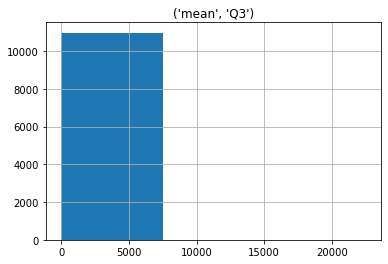

In [164]:
assignlables_4bins(('mean', 'Q3'),310)

C:\tools\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


       (mean, Q4) class_based_on_('mean', 'Q4')
0       12.774000                             B
1             NaN                             D
2       37.395000                             B
3       14.101667                             B
4             NaN                             D
...           ...                           ...
25640         NaN                             D
25641   50.000000                             B
25642         NaN                             D
25643   40.000000                             B
25644   39.000000                             B

[25645 rows x 2 columns]


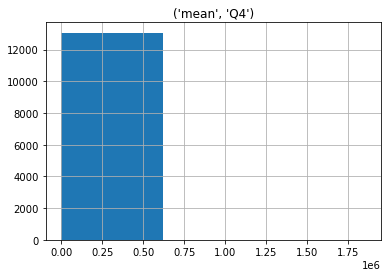

In [165]:
assignlables_4bins(('mean', 'Q4'),450)

In [166]:
for column in selected_donors[0:]:
    print(column)

donorID
zipcode
province
region
gender
language
dateOfBirth
number_of_campaigns
total_amount
last_date
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
('mean', 'Q1')
('mean', 'Q2')
('mean', 'Q3')
('mean', 'Q4')
('sum', 'Q1')
('sum', 'Q2')
('sum', 'Q3')
('sum', 'Q4')
('max', 'Q1')
('max', 'Q2')
('max', 'Q3')
('max', 'Q4')
('min', 'Q1')
('min', 'Q2')
('min', 'Q3')
('min', 'Q4')
age
age-group
giftID
campaignID
amount
date
Quater
has_contributed
class_based_on_last_contribution_day
class_based_on_num_campaigns
class_based_on_Q1_Donations
class_based_on_Q2_Donations
class_based_on_Q3_Donations
class_based_on_Q4_Donations
class_based_on_total_amount
class_based_on_age
class_based_on_age-group
class_based_on_('sum', 'Q1')
class_based_on_('sum', 'Q2')
class_based_on_('sum', 'Q3')
class_based_on_('sum', 'Q4')
class_based_on_('min', 'Q1')
class_based_on_('min', 'Q2')
class_based_on_('min', 'Q3')
class_based_on_('min', 'Q4')
class_based_on_('max', 'Q1')
cla

In [167]:
selected_donors.province = np.where(selected_donors.province == 'ANTWERP', 'Antwerp', selected_donors.province)

number_of_cont_per_district = selected_donors.loc[selected_donors['has_contributed'] == 1, :].groupby('province')['donorID'].count()

selected_donors = selected_donors.merge(number_of_cont_per_district, left_on = 'province', right_on = 'province', how = 'left')


       donorID_y class_based_on_donorID_y
0           22.0                        C
1           54.0                        D
2           22.0                        C
3            1.0                        B
4            1.0                        B
...          ...                      ...
25640       22.0                        C
25641       42.0                        D
25642       54.0                        D
25643       22.0                        C
25644        1.0                        B

[25645 rows x 2 columns]


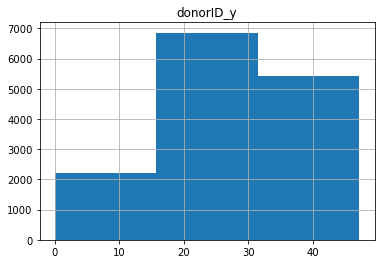

In [168]:
assignlables_4bins('donorID_y', 40, 80, 130)

In [169]:
selected_donors.head()

,donorID_x,zipcode,province,region,gender,language,dateOfBirth,number_of_campaigns,total_amount,last_date,...,"class_based_on_('max', 'Q1')","class_based_on_('max', 'Q2')","class_based_on_('max', 'Q3')","class_based_on_('max', 'Q4')","class_based_on_('mean', 'Q1')","class_based_on_('mean', 'Q2')","class_based_on_('mean', 'Q3')","class_based_on_('mean', 'Q4')",donorID_y,class_based_on_donorID_y
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,12.0,178.49,2011-12-30,...,B,B,B,B,B,B,B,B,22.0,C
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952,1.0,20.00,2015-01-10,...,B,D,D,D,B,D,D,D,54.0,D
2,100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937,3.0,124.37,2011-10-28,...,D,B,D,B,D,B,D,B,22.0,C
3,100009,1020.0,Brussels,Brussels,M,FR,01/20/1932,19.0,326.78,2012-03-25,...,B,B,B,B,B,B,B,B,1.0,B
4,100010,1020.0,Brussels,Brussels,M,FR,05/30/1983,1.0,40.00,2015-01-13,...,B,D,D,D,B,D,D,D,1.0,B


In [170]:
selected_donors['class_based_on_region'] = np.where(selected_donors.region == 'Flanders', 'A', np.where(selected_donors.region == 'Wallonia', 'B', np.where(selected_donors.region == 'Brussels', 'C', 'D')))

selected_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   donorID_x                             25645 non-null  int64         
 1   zipcode                               25645 non-null  float64       
 2   province                              25645 non-null  object        
 3   region                                25645 non-null  object        
 4   gender                                25645 non-null  object        
 5   language                              25645 non-null  object        
 6   dateOfBirth                           25645 non-null  object        
 7   number_of_campaigns                   25644 non-null  float64       
 8   total_amount                          25644 non-null  float64       
 9   last_date                             25644 non-null  datetime64[ns]
 10

In [171]:
number_of_cont_per_language = selected_donors.loc[selected_donors['has_contributed'] == 1, :].groupby('language')['donorID_y'].count()
number_of_cont_per_language

language
FR     16
NL    195
Name: donorID_y, dtype: int64

In [172]:
selected_donors['language'] = np.where(selected_donors.language == 'EN', 'C', np.where(selected_donors.language == 'FR', 'B','A'))

selected_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   donorID_x                             25645 non-null  int64         
 1   zipcode                               25645 non-null  float64       
 2   province                              25645 non-null  object        
 3   region                                25645 non-null  object        
 4   gender                                25645 non-null  object        
 5   language                              25645 non-null  object        
 6   dateOfBirth                           25645 non-null  object        
 7   number_of_campaigns                   25644 non-null  float64       
 8   total_amount                          25644 non-null  float64       
 9   last_date                             25644 non-null  datetime64[ns]
 10

In [173]:
from sklearn.preprocessing import LabelEncoder
X =  selected_donors.drop({'has_contributed','last_date', 'dateOfBirth', 'date'}, axis = 1)
print(X.head())
encoder = LabelEncoder()
for column in X.columns[0:]:
    if X[column].dtype == object:
        X[column] = encoder.fit_transform(X[column])

X.fillna(0)


   donorID_x  zipcode         province    region gender language  \
0     100001   1861.0  Flemish Brabant  Flanders      F        A   
1     100002   2260.0          Antwerp  Flanders      M        A   
2     100008   1780.0  Flemish Brabant  Flanders      M        B   
3     100009   1020.0         Brussels  Brussels      M        B   
4     100010   1020.0         Brussels  Brussels      M        B   

   number_of_campaigns  total_amount  Q1_Donations  Q2_Donations  ...  \
0                 12.0        178.49           3.0           3.0  ...   
1                  1.0         20.00           1.0           NaN  ...   
2                  3.0        124.37           NaN           1.0  ...   
3                 19.0        326.78           5.0           4.0  ...   
4                  1.0         40.00           1.0           NaN  ...   

   class_based_on_('max', 'Q2')  class_based_on_('max', 'Q3')  \
0                             B                             B   
1                     

,donorID_x,zipcode,province,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,...,"class_based_on_('max', 'Q2')","class_based_on_('max', 'Q3')","class_based_on_('max', 'Q4')","class_based_on_('mean', 'Q1')","class_based_on_('mean', 'Q2')","class_based_on_('mean', 'Q3')","class_based_on_('mean', 'Q4')",donorID_y,class_based_on_donorID_y,class_based_on_region
0,100001,1861.0,3,1,0,0,12.0,178.49,3.0,3.0,...,0,0,0,0,0,0,0,22.0,1,0
1,100002,2260.0,0,1,1,0,1.0,20.00,1.0,0.0,...,1,1,1,0,1,1,1,54.0,2,0
2,100008,1780.0,3,1,1,1,3.0,124.37,0.0,1.0,...,0,1,0,2,0,1,0,22.0,1,0
3,100009,1020.0,1,0,1,1,19.0,326.78,5.0,4.0,...,0,0,0,0,0,0,0,1.0,0,2
4,100010,1020.0,1,0,1,1,1.0,40.00,1.0,0.0,...,1,1,1,0,1,1,1,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,1640.0,3,1,1,1,1.0,40.00,0.0,0.0,...,1,0,1,2,1,0,1,22.0,1,0
25641,144683,9308.0,2,1,2,0,1.0,50.00,0.0,0.0,...,1,1,0,2,1,1,0,42.0,2,0
25642,144686,2440.0,0,1,0,0,1.0,50.00,0.0,1.0,...,0,1,1,2,0,1,1,54.0,2,0
25643,144690,1950.0,3,1,1,1,1.0,40.00,0.0,0.0,...,1,1,0,2,1,1,0,22.0,1,0


In [174]:
X = X.fillna(0.0)
X.isna().sum().sum()

0

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y = selected_donors['has_contributed']
logreg = LogisticRegression(random_state=0, max_iter=1)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaco

{'logreg': {'Acc_train': 0.9917553339646816, 'Acc_test': 0.9918118014036912}}

In [176]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.5524125694483446

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    # Neural Network
mlp = MLPClassifier(
        hidden_layer_sizes=(32, 16),
        batch_size=32,
        early_stopping=False,
        random_state=42,
    )
mlp = mlp.fit(X_train, y_train)

    # predict probabilities
pred_train = mlp.predict(X_train)
pred_test = mlp.predict(X_test)

    # evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"NN": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


{'NN': {'Acc_train': 0.9941996490543966, 'Acc_test': 0.9939559368297913}}

In [178]:
roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.996953017495577

In [179]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, stratify=y, random_state=42
    )
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

    # predict probabilities
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

    # evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train)
mlp_acc_test = accuracy_score(y_test, pred_test)

eval_dict = {"RF": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


{'RF': {'Acc_train': 0.9994800805875089, 'Acc_test': 0.9998050302203159}}